In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vega_datasets import data

In this notebook I will use a dataset from `vega_datasets` module. Specifically the `seattle_weather` dataset.

In [3]:
# loading the dataset
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# Eliminating the unnecessary columns
weather = weather[["precipitation", "temp_max", "temp_min", "wind"]]
weather.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [5]:
# checking what the correlation looks like
weather.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


## Drawing the Heatmap

In [6]:
correlation = weather.corr()

Using the `imshow` method from matplotlib's pyplot module

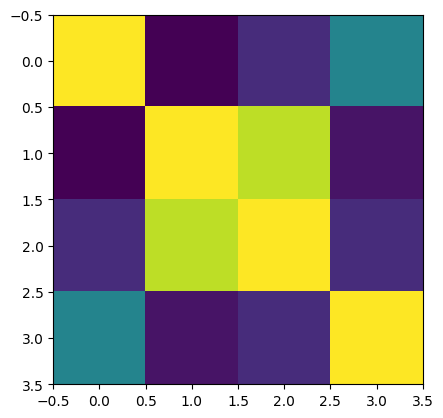

In [7]:
plt.imshow(correlation)

The above method will just show a basic heatmap. Let's add some styles to it. Like changing the color or size.

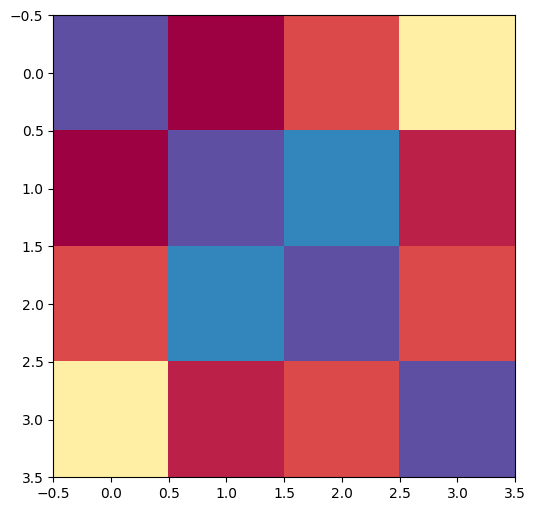

In [8]:
plt.imshow(correlation, cmap="Spectral")
plt.gcf().set_size_inches(6, 6)

Let's add color bar and tick labels to the above plot

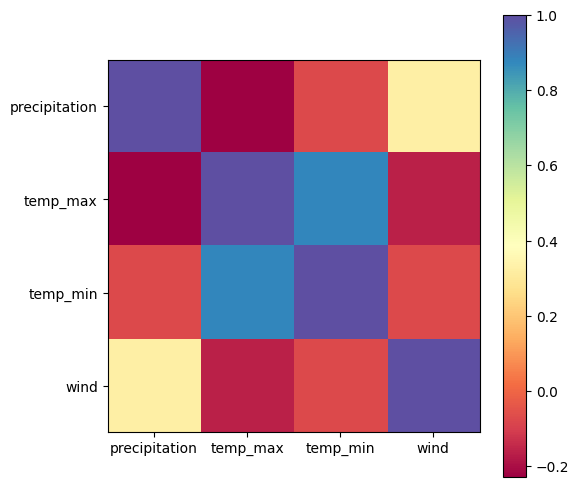

In [14]:
plt.imshow(correlation, cmap="Spectral")
plt.gcf().set_size_inches(6, 6)

# adding color bar
plt.colorbar()  # for vertical orientation
# plt.colorbar(orientation="horizontal")  # for horizontal orientation

# adding tick labels
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns)
plt.yticks(ticks=range(len(correlation)), labels=correlation.columns)

# showing the graph
plt.show();

Now let's add the correlation values on the graph.

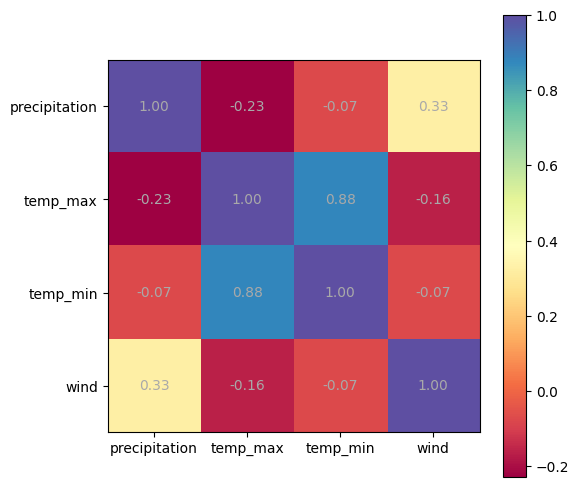

In [20]:
plt.imshow(correlation, cmap="Spectral")
plt.gcf().set_size_inches(6, 6)

# adding color bar
plt.colorbar()  # for vertical orientation
# plt.colorbar(orientation="horizontal")  # for horizontal orientation

# adding tick labels
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns)
plt.yticks(ticks=range(len(correlation)), labels=correlation.columns)

# to add the values, we need to loop though the correlation values
labels = correlation.values
for i in range(len(labels)):  # looping through rows
    for j in range(len(labels[0])):  # looping through the columns
        # because the columns are reverted, we need to extract columns first from the values
        plt.text(i, j, "{:.2f}".format(labels[j, i]), ha="center", va="center", color="darkgray")

# showing the graph
plt.show();

We can show the colored heatmap instead of boxed heatmap by setting the `interpolation` attribute to `gaussian`

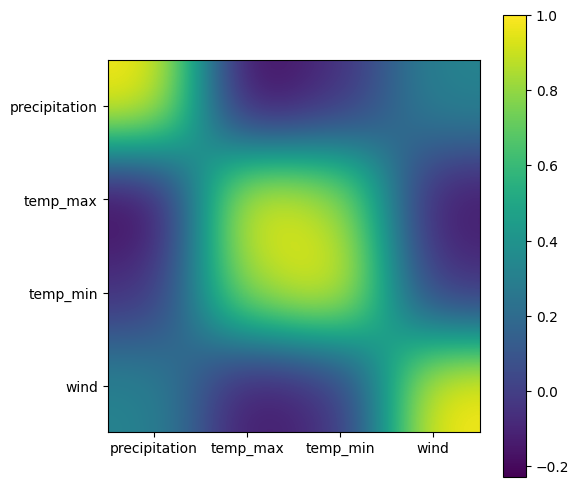

In [26]:
plt.imshow(correlation, interpolation='gaussian')
plt.gcf().set_size_inches(6, 6)

# adding color bar
plt.colorbar()

# adding tick labels
plt.xticks(ticks=range(len(correlation)), labels=correlation.columns)
plt.yticks(ticks=range(len(correlation)), labels=correlation.columns)

# showing the graph
plt.show();